# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

metadata_study_combined = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
metadata_study_combined.head()   #doesn't look like data from in starter


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_number = metadata_study_combined["Mouse ID"].nunique()
mice_number   #number is correct 

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


duplicate_timepoints = metadata_study_combined[metadata_study_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
double_MiceID = duplicate_timepoints['Mouse ID'].unique()



double_MiceID   #this one is not print the last three rows fromt the starter code 

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = metadata_study_combined[metadata_study_combined['Mouse ID'] == 'g989']

duplicate_mouse_data #this looks right for the most part

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_metadata_study = metadata_study_combined.drop(duplicate_mouse_data.index)

clean_metadata_study.head() #how do i get it too look like the starter code

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_metadata_study['Mouse ID'].nunique()
clean_mice  #this number is correct 

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = metadata_study_combined.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Std_Dev=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem'))

summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

summary_statistics #this looks like the starter

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_metadata_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


#summary_stats_with_title = summary_stats.rename_axis('Tumor Volume (mm3)')

#index = summary_stats.index 
#index.name = "Tumor Volume (mm3)"



  
summary_stats 

#need help here need to add Tumor Volume (mm3)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

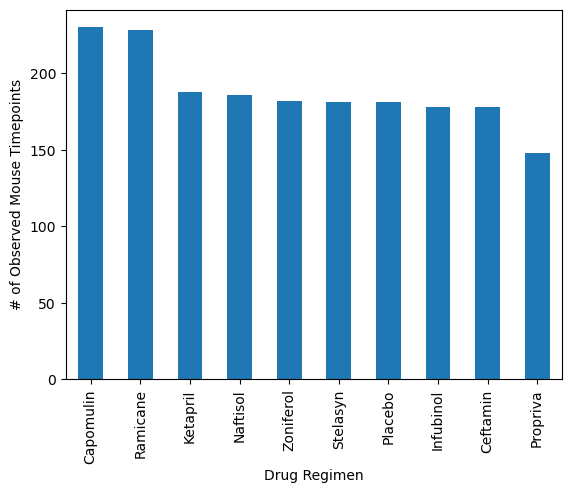

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_metadata_study['Drug Regimen'].value_counts() #clean_metadata_study

drug_regimen.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show() #this is fine

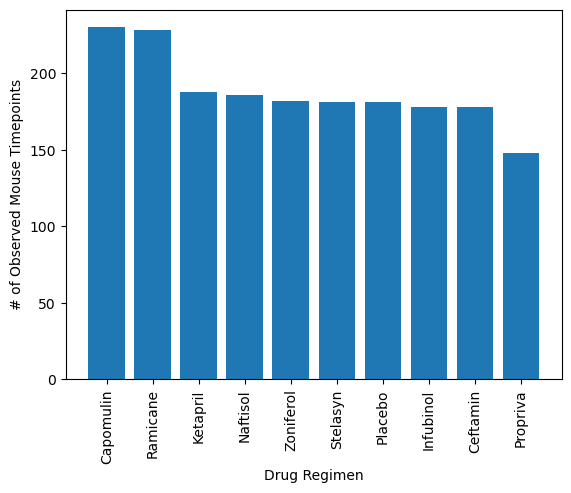

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen.index, drug_regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show() #this is fine

<Axes: ylabel='count'>

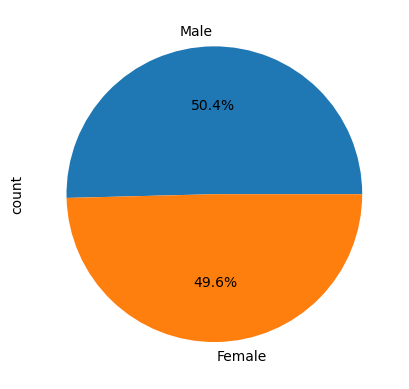

In [39]:

# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_metadata_study.drop_duplicates(subset=['Mouse ID', 'Sex'])
# Get the unique mice with their gender

gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct="%1.1f%%")

#gender_counts.plot.pie(autopct="%1.1f%%", startangle=0, colors=['lightblue', 'pink'], explode=(0.1, 0), shadow=True)  

#this is okay colors aren't the same but whatevs

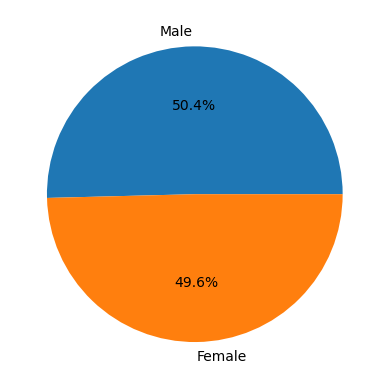

In [47]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

#unique_mice = metadata_study_combined.drop_duplicates(subset=['Mouse ID', 'Sex'])
#gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
#plt.figure(figsize=(8, 6)) 
#plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%") 


plt.show()  #why does count not show

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = metadata_study_combined.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, metadata_study_combined, on=['Mouse ID', 'Timepoint'], how='inner')

In [49]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']


# add subset
    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)


    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


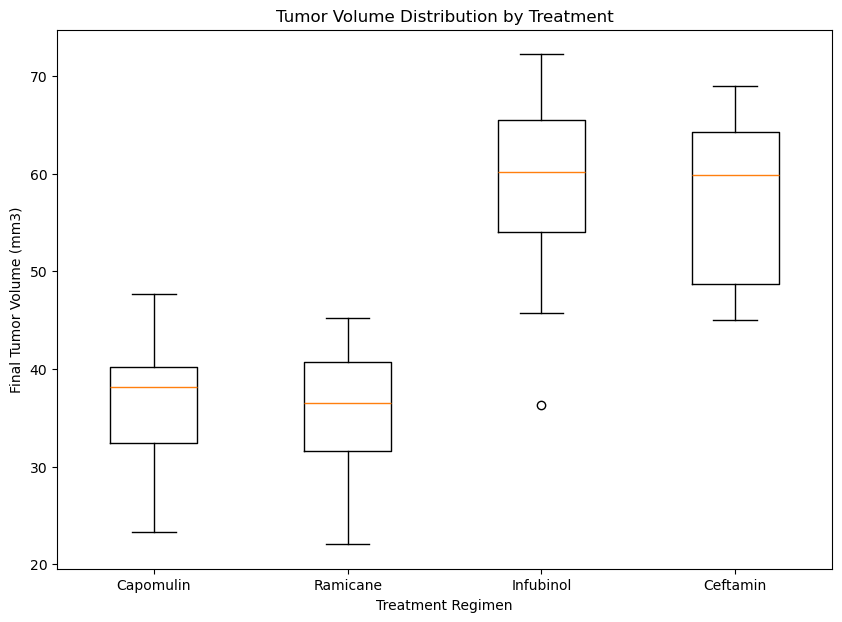

In [50]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 7))  # Optional: Adjust the figure size
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [72]:
print(capomulin_mouse_data.dtypes)

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


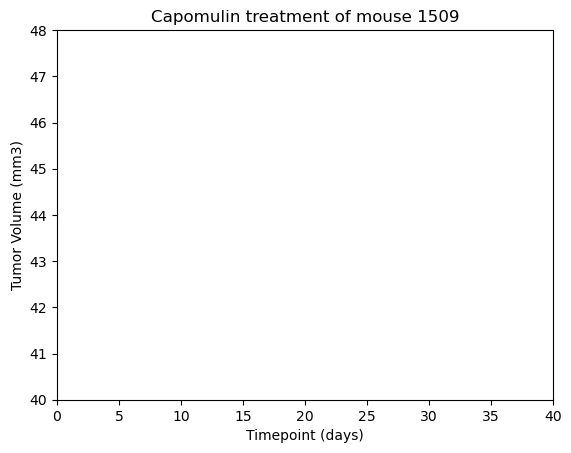

In [99]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


Timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40]
Tumor_Volume_mm3 = [45, 44, 42, 40, 38, 37, 35, 34, 32]


#capomulin_time_vs_volume = pd.DataFrame({'Timepoint': Timepoint, 'Tumor Volume (mm3)': Tumor_Volume_mm3})


#plt.plot(capomulin_time_vs_volume['Timepoint'], capomulin_time_vs_volume['Tumor Volume (mm3)'])
#plt.xlabel('Timepoint (days)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.title('Capomulin treatment of mouse I509')
#plt.ylim(30, 50)
#plt.xlim(0, 45)
#plt.show()

#Timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40]
#Tumor_Volume_mm3 = [45, 44, 42, 40, 38, 37, 35, 34, 32]

capomulin_data = clean_metadata_study[clean_metadata_study['Drug Regimen'] == 'Capomulin']

#capomulin_mouse_data = capomulin_data[(capomulin_data['Mouse ID'] == 'I509')]  


capomulin_time_vs_volume = pd.DataFrame(capomulin_data, {'Timepoint': Timepoint, 'Tumor Volume (mm3)': Tumor_Volume_mm3})


plt.plot(capomulin_time_vs_volume['Timepoint'], capomulin_time_vs_volume['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse 1509')
plt.ylim(40, 48)
plt.xlim(0, 40)
plt.show()  #need help

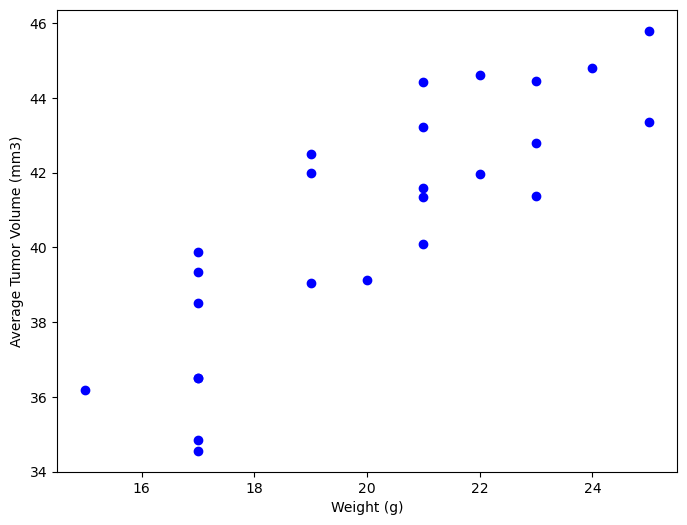

In [104]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

capomulin_weight_vs_volume = pd.DataFrame({
    'Weight (g)': mouse_weight,
    'Average Tumor Volume (mm3)': avg_tumor_vol})

plt.figure(figsize=(8, 6))
plt.scatter(capomulin_weight_vs_volume['Weight (g)'], 
            capomulin_weight_vs_volume['Average Tumor Volume (mm3)'], 
            color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()


## Correlation and Regression

Correlation coefficient: 0.8419363424694722


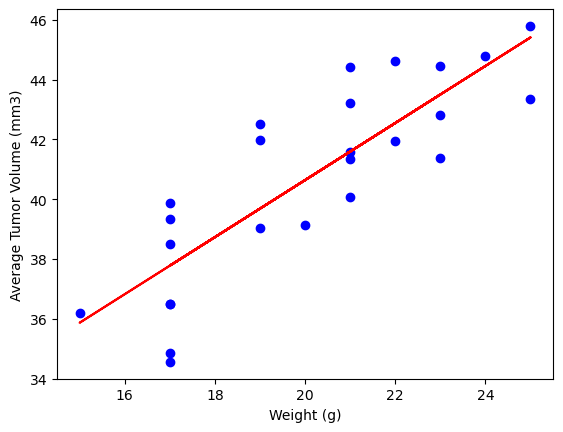

In [109]:
# Calculate the correlation coefficient and a linear regression model
correlation_coefficient = np.corrcoef(capomulin_weight_vs_volume['Weight (g)'], 
                                      capomulin_weight_vs_volume['Average Tumor Volume (mm3)'])[0, 1]
print(f"Correlation coefficient: {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weight_vs_volume['Weight (g)'], 
                                                            capomulin_weight_vs_volume['Average Tumor Volume (mm3)'])
#print(f"Slope: {slope}")
#print(f"Intercept: {intercept}")
#print(f"R-squared: {r_value**2}")

regression_line = slope * capomulin_weight_vs_volume['Weight (g)'] + intercept

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(capomulin_weight_vs_volume['Weight (g)'], 
            capomulin_weight_vs_volume['Average Tumor Volume (mm3)'], 
            color='blue')


plt.plot(capomulin_weight_vs_volume['Weight (g)'], regression_line, color='red', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#plt.text(18, 45, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='black')
plt.show()
